In [30]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fakernewsdata/fake_news.csv
/kaggle/input/glove6b50dtxt/glove.6B.50d.txt


In [74]:
df = pd.read_csv('/kaggle/input/fakernewsdata/fake_news.csv')
df =df.reindex(np.random.permutation(df.index))
df.head()

,Unnamed: 0,title,text,label
35016,35016,BENGHAZI WIDOW Hits Back At Hillary’s Heartles...,"Dorothy Woods, the wife of an ex-Navy SEAL kil...",FAKE
27943,27943,BREAKING: Highest-Ranking Elected Republican ...,The GOP implosion we have been waiting for has...,FAKE
17728,17728,Brutal Myanmar army operation aimed at prevent...,GENEVA (Reuters) - Myanmar security forces hav...,TRUE
37638,37638,BREITBART’S JOEL POLLACK Brilliantly Shuts Dow...,Watch Joy Behar as she hilariously attempts to...,FAKE
6125,6125,Trump says lawsuit charging he violated Consti...,WASHINGTON (Reuters) - U.S. President Donald T...,TRUE


In [75]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()


,title,text,label
35016,BENGHAZI WIDOW Hits Back At Hillary’s Heartles...,"Dorothy Woods, the wife of an ex-Navy SEAL kil...",1
27943,BREAKING: Highest-Ranking Elected Republican ...,The GOP implosion we have been waiting for has...,1
17728,Brutal Myanmar army operation aimed at prevent...,GENEVA (Reuters) - Myanmar security forces hav...,0
37638,BREITBART’S JOEL POLLACK Brilliantly Shuts Dow...,Watch Joy Behar as she hilariously attempts to...,1
6125,Trump says lawsuit charging he violated Consti...,WASHINGTON (Reuters) - U.S. President Donald T...,0


In [76]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

In [77]:
df.head()

,title,text,label
35016,BENGHAZI WIDOW Hits Back Hillary’s Heartless “...,"Dorothy Woods, the wife of an ex-Navy SEAL kil...",1
27943,BREAKING: Highest-Ranking Elected Republican S...,The GOP implosion we have been waiting for has...,1
17728,Brutal Myanmar army operation aimed preventing...,GENEVA (Reuters) - Myanmar security forces hav...,0
37638,BREITBART’S JOEL POLLACK Brilliantly Shuts “Th...,Watch Joy Behar as she hilariously attempts to...,1
6125,Trump says lawsuit charging violated Constitut...,WASHINGTON (Reuters) - U.S. President Donald T...,0


In [78]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, ' ')

In [79]:
df.head()

,title,text,label
35016,BENGHAZI WIDOW Hits Back Hillary’s Heartless “...,"Dorothy Woods, the wife of an ex-Navy SEAL kil...",1
27943,BREAKING Highest Ranking Elected Republican S...,The GOP implosion we have been waiting for has...,1
17728,Brutal Myanmar army operation aimed preventing...,GENEVA (Reuters) - Myanmar security forces hav...,0
37638,BREITBART’S JOEL POLLACK Brilliantly Shuts “Th...,Watch Joy Behar as she hilariously attempts to...,1
6125,Trump says lawsuit charging violated Constitut...,WASHINGTON (Reuters) - U.S. President Donald T...,0


In [80]:
df['title']=df['title'].str.lower()
df.head()

,title,text,label
35016,benghazi widow hits back hillary’s heartless “...,"Dorothy Woods, the wife of an ex-Navy SEAL kil...",1
27943,breaking highest ranking elected republican s...,The GOP implosion we have been waiting for has...,1
17728,brutal myanmar army operation aimed preventing...,GENEVA (Reuters) - Myanmar security forces hav...,0
37638,breitbart’s joel pollack brilliantly shuts “th...,Watch Joy Behar as she hilariously attempts to...,1
6125,trump says lawsuit charging violated constitut...,WASHINGTON (Reuters) - U.S. President Donald T...,0


In [81]:
df['title'] = df['title'].str.replace(r"[\"\',]", '')
df.head()

,title,text,label
35016,benghazi widow hits back hillary’s heartless “...,"Dorothy Woods, the wife of an ex-Navy SEAL kil...",1
27943,breaking highest ranking elected republican s...,The GOP implosion we have been waiting for has...,1
17728,brutal myanmar army operation aimed preventing...,GENEVA (Reuters) - Myanmar security forces hav...,0
37638,breitbart’s joel pollack brilliantly shuts “th...,Watch Joy Behar as she hilariously attempts to...,1
6125,trump says lawsuit charging violated constitut...,WASHINGTON (Reuters) - U.S. President Donald T...,0


In [82]:
path = '/kaggle/input/'

EMBEDDING_FILE=f'{path}glove6b50dtxt/glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64
EPOCHS = 5

In [86]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [87]:
y.shape

(44898,)

In [88]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [89]:
print('Loading in comments...')

sentences = X.fillna("DUMMY_VALUE").values

targets = y

Loading in comments...


In [90]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(df['title']))
X = tokenizer.texts_to_sequences(list(df['title']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [91]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 29101 unique tokens.


In [92]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [93]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

In [94]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy']
)
model.summary()

Building model...
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 100, 50)           1000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100, 30)           7920      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,007,951
Trainable params: 7,951
Non-trainable params: 1,000,000
_________________________________________________________________


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, df.label,test_size=0.25, random_state=0)

In [96]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Train on 26938 samples, validate on 6735 samples
Epoch 1/5
26938/26938 [==============================] - 29s 1ms/step - loss: 0.2032 - accuracy: 0.9164 - val_loss: 0.1563 - val_accuracy: 0.9397
Epoch 2/5
26938/26938 [==============================] - 26s 950us/step - loss: 0.1268 - accuracy: 0.9497 - val_loss: 0.1294 - val_accuracy: 0.9486
Epoch 3/5
26938/26938 [==============================] - 26s 975us/step - loss: 0.1047 - accuracy: 0.9586 - val_loss: 0.1246 - val_accuracy: 0.9513
Epoch 4/5
26938/26938 [==============================] - 26s 974us/step - loss: 0.0883 - accuracy: 0.9674 - val_loss: 0.1158 - val_accuracy: 0.9543
Epoch 5/5
26938/26938 [==============================] - 26s 951us/step - loss: 0.0746 - accuracy: 0.9714 - val_loss: 0.1247 - val_accuracy: 0.9501


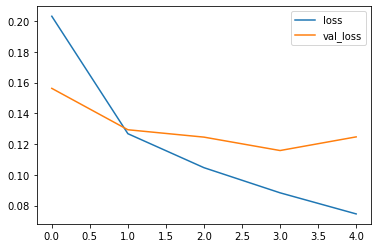

In [97]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

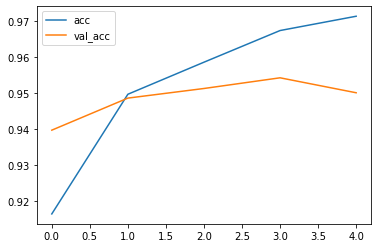

In [98]:
# Plotting accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [99]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

33673/33673 [==============================] - 15s 444us/step
Accuracy of the model on Training Data is -  97.27972149848938
11225/11225 [==============================] - 5s 428us/step
Accuracy of the model on Testing Data is -  94.69932913780212


In [102]:
pred = model.predict(X_test)
pred[:5]

array([[0.99847406],
       [0.9987595 ],
       [0.02394417],
       [0.99965596],
       [0.9998542 ]], dtype=float32)

## Confusion Matrix

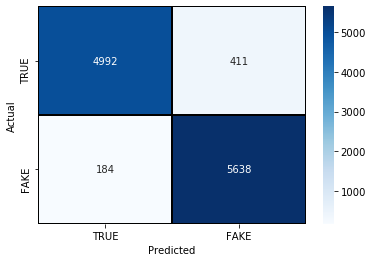

In [105]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification report

In [106]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5403
           1       0.93      0.97      0.95      5822

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [112]:
y_pred = model.predict(X_test).ravel()

## ROC AUC PLOT

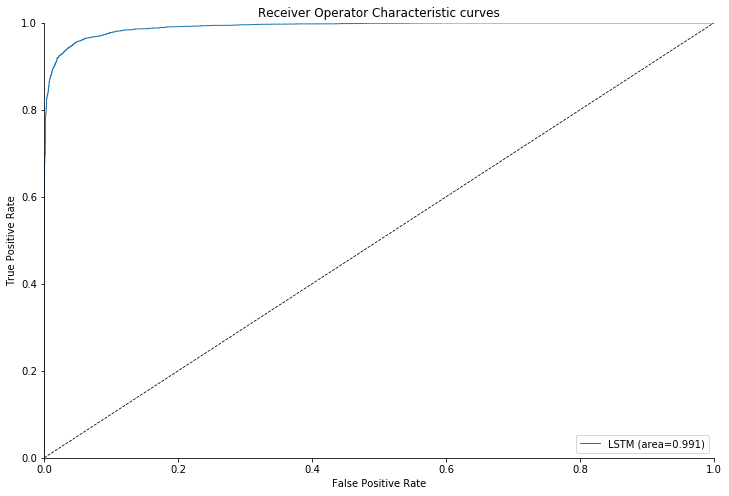

In [115]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()